
## Q1: Write Custom Function to Compute Histogram for a Numerical Array

- You can use numpy

- Your function takes two arguments: 1- list 2- interval

- Your function would return a dictionary with intervals as keys and how many of elements in list are in the intervals as values

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Notebooks/Datasets/titanic.csv')

In [7]:
# histogram function

def custom_hist(ls, intervals):
    # define a dict to return
    ages_dict = dict()
    # find the min value
    minimum = int(np.min(ls))
    # find the max value
    maximum = int(np.max(ls))
    # compute the size of an interval
    I = ((maximum - minimum) / intervals)
    # iterate through and find the number of people in each interval
    for j in range(intervals):
        upper, lower = (minimum + (j+1) *I), (minimum + j*I)
        # find the number of people in this interval
        # subset_in_interval = np.sum((ls >= lower) & (ls <= upper))
        subset_in_interval = np.sum((ls <= upper))
        # key for each entry is the lower bound, value is the number of people in the interval
        ages_dict[lower] = subset_in_interval
    return ages_dict
print(custom_hist(df['Age'].dropna().values, 16))

{0.0: 44, 5.0: 64, 10.0: 83, 15.0: 179, 20.0: 301, 25.0: 409, 30.0: 497, 35.0: 564, 40.0: 611, 45.0: 650, 50.0: 674, 55.0: 692, 60.0: 706, 65.0: 709, 70.0: 713, 75.0: 714}


## For visualization part, you should elaborate on the following 

<BarContainer object of 16 artists>

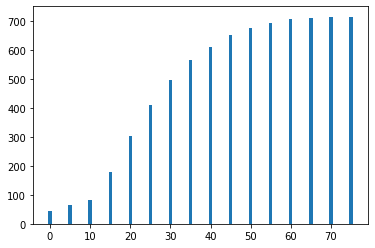

In [8]:
import matplotlib.pyplot as plt

hist_dict = custom_hist(df['Age'].dropna().values, 16)
plt.bar(list(hist_dict.keys()), list(hist_dict.values()))

## Q2: How we can plot histogram of Age for female and male with legend?  

Use Pandas with .groupby method and plot the following 

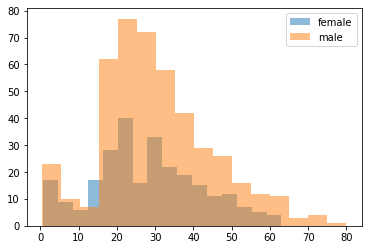

In [9]:
ages_by_sex = df.groupby('Sex')['Age']
ages_by_sex.hist(alpha=0.5, bins=16, grid=False)
plt.legend(['female', 'male'])
plt.show()